In [402]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from itertools import *

plt.rc('figure', figsize=(10, 10))

10. This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

- More up days than down (56% Up)
- Correlation between volume and Year (0.84 Pearson's)
- No obvious relationship between any of the Lags and Direction.

In [9]:
weekly_dat = pd.read_csv('weekly.csv')
weekly_dat = weekly_dat.drop(weekly_dat.columns[0], axis=1)
weekly_dat['Direction'] = weekly_dat['Direction'].map({'Down' : 0, 'Up' :1})
weekly_dat.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [11]:
weekly_dat.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


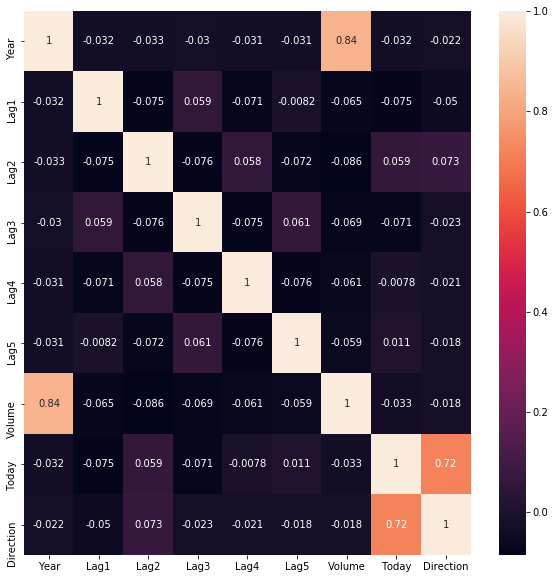

In [23]:
sns.heatmap(weekly_dat.corr(), annot=True)

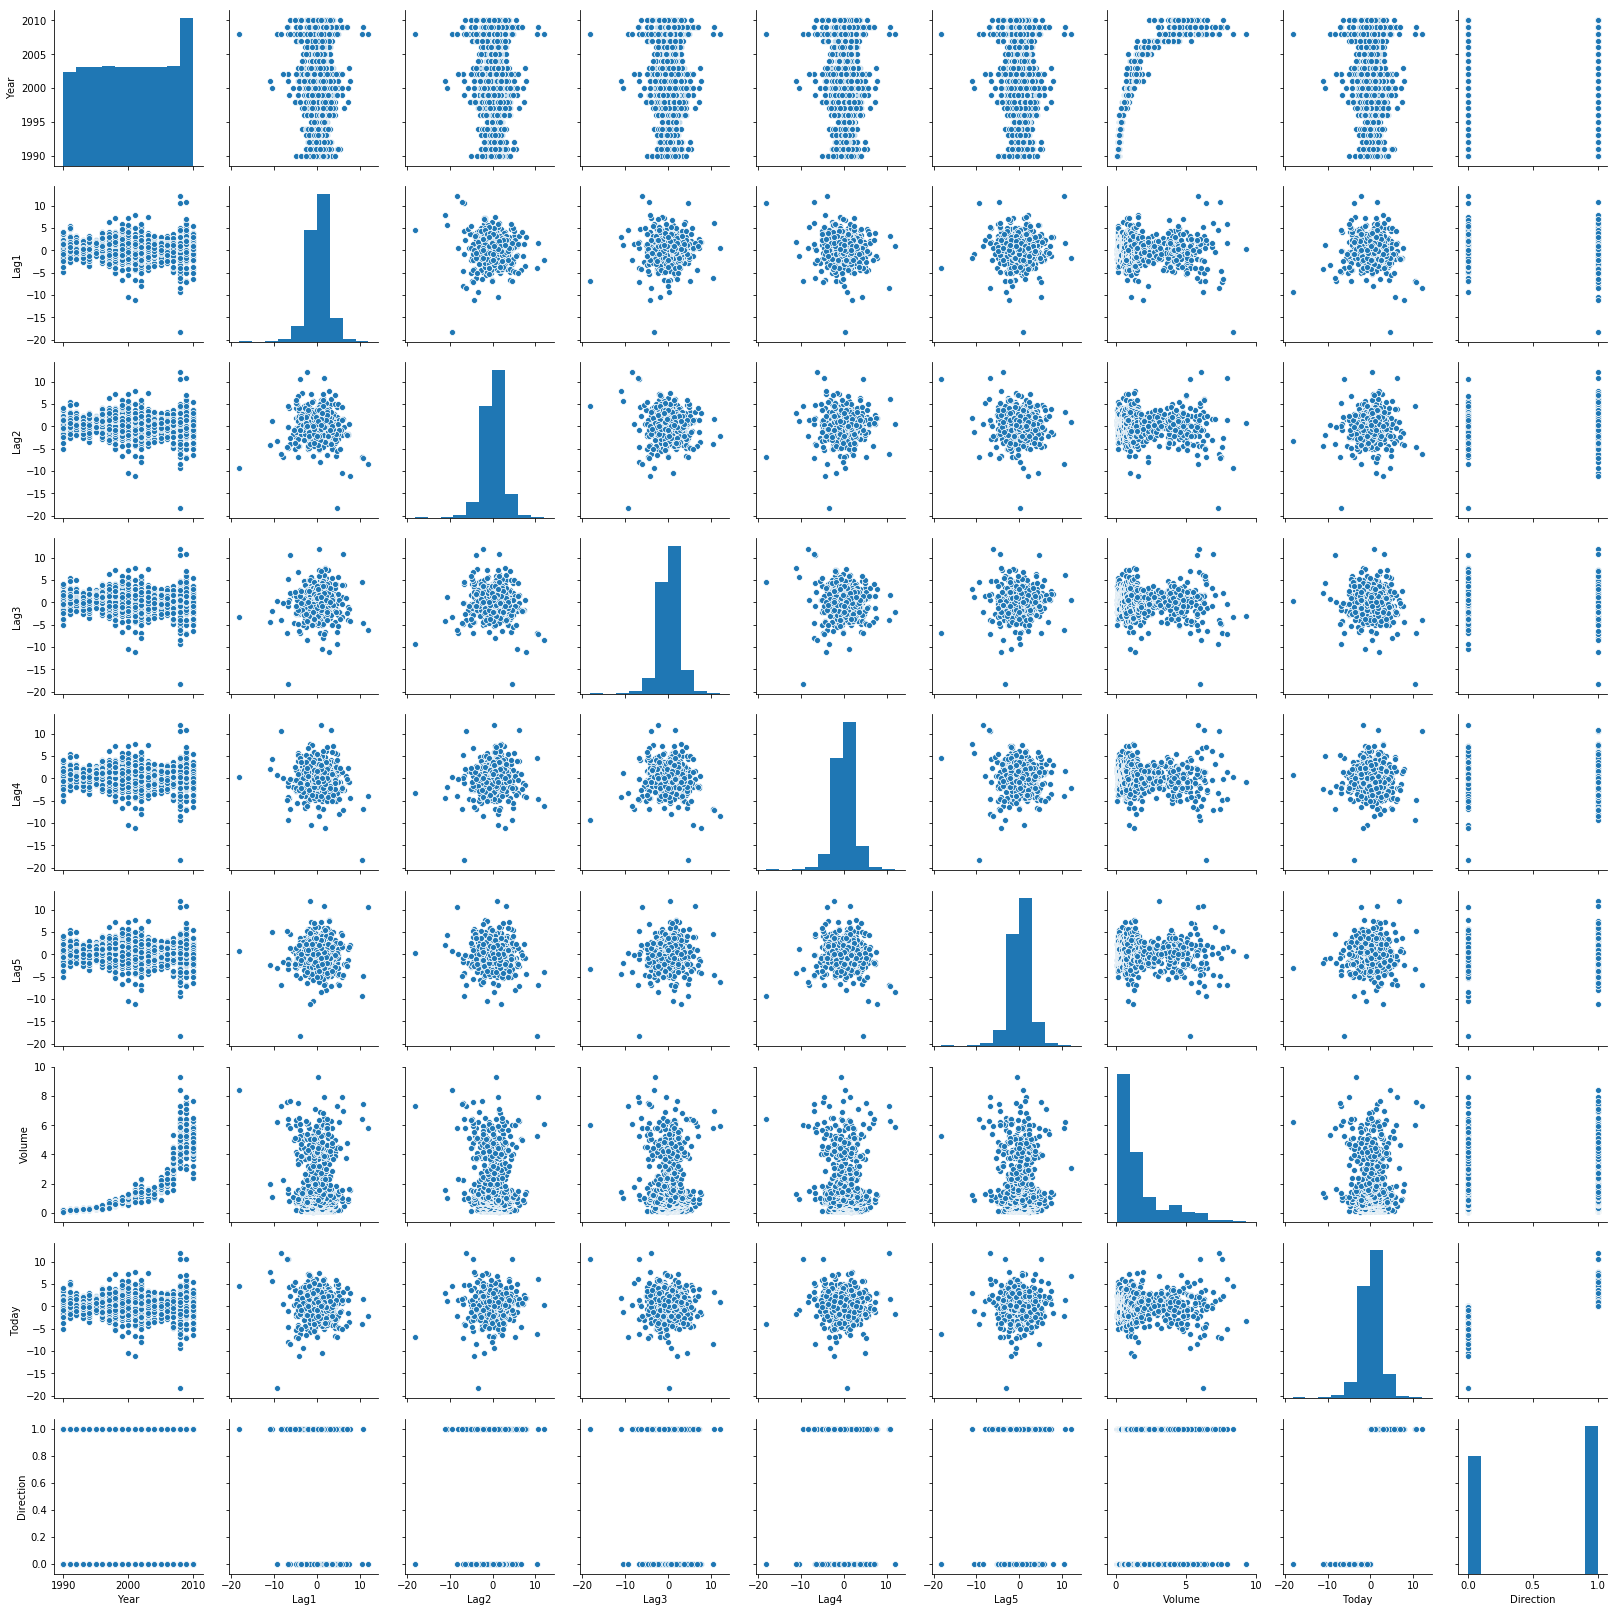

In [25]:
sns.pairplot(weekly_dat)

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

- Lag2 has a p-value of 0.030, indicating a statistically significant result. The coefficient for Lag2 is 0.0584; a unit increase in Lag2 is associated with a 0.0584 increase in the log-odds of today being an up day.

In [128]:
formula = 'Direction ~ ' + ' + '.join(weekly_dat.drop(['Direction', 'Today', 'Year'], axis=1).columns)
logit_model = smf.logit(formula=formula, data=weekly_dat).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Thu, 20 Sep 2018   Pseudo R-squ.:                0.006580
Time:                        14:12:45   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

- Accuracy = (54 + 557) / (54 + 557 + 48 + 430) = 0.5610651974
- Negative Predictive Value: 54 / (54 + 48) = 0.5294117647
- Positive Predictive Value (Precision): 557 / (557 + 430) = 0.5643363728
- True Positive Rate (Sensitivity): 557 / (557 + 48) = 0.920661157
- True Negative Rate (Specificity): 54 / (54 + 430) = 0.1115702479

The overall prediction accuracy is 56% which is better than random guessing (50%) but the same as a naive classifier which always predicts Up (56%).

The negative predictive value is 53% - when the prediction is for a down day, it is correct 53% of the time.

The positive predicitve value is 56% - when the prediction is for a down day, it is correct 56% of the time.

The classifier has relatively high sensitivity - when the day is an up day, the classifier will have predicted an up day 92% of the time.

The classifier has low specificity - when the day is a down day, the classifier will have predicted a down day 11% of the time.


The classifier is producing a large number (430) of false positives relative to the number of false negatives (48). We could try and reduce the number of false positives by increasing the probability threshold - this would come at the cost of an increased number of false negatives and reduced overall accuracy.

In [113]:
def print_conf_matrix_stats(conf_mtrx):
    acc = (conf_mtrx[0][0] + conf_mtrx[1][1]) / (conf_mtrx[0][0] + conf_mtrx[0][1] + conf_mtrx[1][0] + conf_mtrx[1][1])
    npv = (conf_mtrx[0][0] / (conf_mtrx[0][0] + conf_mtrx[0][1]))
    ppv = (conf_mtrx[1][1] / (conf_mtrx[1][0] + conf_mtrx[1][1]))
    tpr = (conf_mtrx[1][1] / (conf_mtrx[0][1] + conf_mtrx[1][1]))
    tnr = (conf_mtrx[0][0] / (conf_mtrx[0][0] + conf_mtrx[1][0]))
    print('accuracy: {}'.format(acc))
    print('npv: {}'.format(npv))
    print('ppv: {}'.format(ppv))
    print('tpr: {}'.format(tpr))
    print('tnr: {}'.format(tnr))

In [114]:
preds = (logit_model.predict(weekly_dat) > 0.5)
conf_mtrx = metrics.confusion_matrix(preds, weekly_dat['Direction'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index=['Down', 'Up'])

accuracy: 0.5537190082644629
npv: 0.4927536231884058
ppv: 0.562565720294427
tpr: 0.8842975206611571
tnr: 0.14049586776859505


,Down,Up
Down,68,70
Up,416,535


In [240]:
preds = (logit_model.predict(weekly_dat) > 0.6)
conf_mtrx = metrics.confusion_matrix(preds, weekly_dat['Direction'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index=['Down', 'Up'])

accuracy: 0.472910927456382
npv: 0.453416149068323
ppv: 0.6260162601626016
tpr: 0.12727272727272726
tnr: 0.9049586776859504


,Down,Up
Down,438,528
Up,46,77


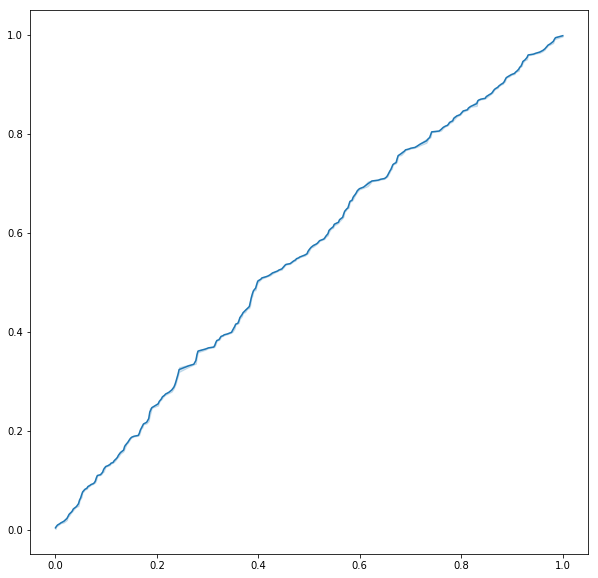

In [246]:
fpr, tpr, thresh = metrics.roc_curve(weekly_dat['Direction'], logit_model.predict(weekly_dat))
sns.lineplot(x=fpr, y=tpr)

# The ROC plot looks like the `No Information` line.

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [248]:
pre = weekly_dat[weekly_dat['Year'] < 2008]
post = weekly_dat[weekly_dat['Year'] >= 2008]
formula = 'Direction ~ Lag2'
logit_model = smf.logit(formula=formula, data=pre).fit()
preds = (logit_model.predict(post) > 0.5)
conf_mtrx = metrics.confusion_matrix(preds, post['Direction'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index=['Down', 'Up'])

Optimization terminated successfully.
         Current function value: 0.685159
         Iterations 4
accuracy: 0.5512820512820513
npv: 0.5833333333333334
ppv: 0.5486111111111112
tpr: 0.9404761904761905
tnr: 0.09722222222222222


,Down,Up
Down,7,5
Up,65,79


(e) Repeat (d) using LDA.

In [260]:
lda = LinearDiscriminantAnalysis()
lda.fit(pd.DataFrame(pre['Lag2']), pre['Direction'])
preds = lda.predict(pd.DataFrame(post['Lag2']))
conf_mtrx = metrics.confusion_matrix(preds, post['Direction'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index=['Down', 'Up'])

accuracy: 0.5448717948717948
npv: 0.5454545454545454
ppv: 0.5448275862068965
tpr: 0.9404761904761905
tnr: 0.08333333333333333


,Down,Up
Down,6,5
Up,66,79


(f) Repeat (d) using QDA.

In [261]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(pd.DataFrame(pre['Lag2']), pre['Direction'])
preds = qda.predict(pd.DataFrame(post['Lag2']))
conf_mtrx = metrics.confusion_matrix(preds, post['Direction'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index=['Down', 'Up'])

accuracy: 0.5384615384615384
npv: nan
ppv: 0.5384615384615384
tpr: 1.0
tnr: 0.0


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,Down,Up
Down,0,0
Up,72,84


(g) Repeat (d) using KNN with K = 1.

In [262]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(pd.DataFrame(pre['Lag2']), pre['Direction'])
preds = knn.predict(pd.DataFrame(post['Lag2']))
conf_mtrx = metrics.confusion_matrix(preds, post['Direction'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index=['Down', 'Up'])

accuracy: 0.4935897435897436
npv: 0.4507042253521127
ppv: 0.5294117647058824
tpr: 0.5357142857142857
tnr: 0.4444444444444444


,Down,Up
Down,32,39
Up,40,45


In [265]:
# naive 'always up' classifier on test set
(post['Direction'] == 1).mean()

0.5384615384615384

(h) Which of these methods appears to provide the best results on
this data?

**Logistic Regression**
- accuracy: 0.5512820512820513
- npv: 0.5833333333333334
- ppv: 0.5486111111111112
- tpr: 0.9404761904761905
- tnr: 0.09722222222222222

**LDA**
- accuracy: 0.5448717948717948
- npv: 0.5454545454545454
- ppv: 0.5448275862068965
- tpr: 0.9404761904761905
- tnr: 0.08333333333333333

**QDA**
- accuracy: 0.5384615384615384
- npv: nan
- ppv: 0.5384615384615384
- tpr: 1.0
- tnr: 0.0

**KNN (k=1)**
- accuracy: 0.4935897435897436
- npv: 0.4507042253521127
- ppv: 0.5294117647058824
- tpr: 0.5357142857142857
- tnr: 0.4444444444444444

Logistic has the highest overall prediction accuracy (55%) on this data.

(i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

**Logistic Regression**

In [285]:
# Try all (2 ^ 6) - 1 combinations of independent variables

def logistic_reg_acc(formula):
    logit_model = smf.logit(formula=formula, data=pre).fit()
    preds = (logit_model.predict(post) > 0.5)
    return (preds == post['Direction']).mean()

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

indi_vars = pre.drop(['Direction', 'Year', 'Today'], axis=1).columns

res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    formula = 'Direction ~ ' + ' + '.join(indi_var_combo)
    res.append([logistic_reg_acc(formula), formula])

sorted(res, key=lambda x: x[0], reverse=True)

Optimization terminated successfully.
         Current function value: 0.685000
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685159
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686122
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686014
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684933
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686244
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684039
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684850
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684664
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683546
  

[[0.5833333333333334, 'Direction ~ Lag1 + Lag2 + Lag4 + Volume'],
 [0.5833333333333334, 'Direction ~ Lag2 + Lag3 + Lag4 + Volume'],
 [0.5705128205128205, 'Direction ~ Lag2 + Lag3 + Lag4'],
 [0.5705128205128205, 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Volume'],
 [0.5641025641025641, 'Direction ~ Lag1'],
 [0.5641025641025641, 'Direction ~ Lag2 + Volume'],
 [0.5641025641025641, 'Direction ~ Lag2 + Lag3 + Volume'],
 [0.5576923076923077, 'Direction ~ Lag2 + Lag4'],
 [0.5576923076923077, 'Direction ~ Lag1 + Lag2 + Volume'],
 [0.5576923076923077, 'Direction ~ Lag1 + Lag3 + Lag4'],
 [0.5576923076923077, 'Direction ~ Lag2 + Lag3 + Lag5'],
 [0.5576923076923077, 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4'],
 [0.5512820512820513, 'Direction ~ Lag2'],
 [0.5512820512820513, 'Direction ~ Lag1 + Lag3'],
 [0.5512820512820513, 'Direction ~ Lag1 + Volume'],
 [0.5512820512820513, 'Direction ~ Lag2 + Lag3'],
 [0.5512820512820513, 'Direction ~ Lag2 + Lag5'],
 [0.5512820512820513, 'Direction ~ Lag1 + Lag2 + Lag

In [290]:
# Try all (2 ^ 6) - 1 combinations of independent variables with all possible
# formulae containing one interaction term

indi_vars = pre.drop(['Direction', 'Year', 'Today'], axis=1).columns

res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    # no interactions
    formula = 'Direction ~ ' + ' + '.join(indi_var_combo)
    res.append([logistic_reg_acc(formula), formula])
    # interactions
    if len(indi_var_combo) == 2:
        formula = 'Direction ~ ' + ' * '.join(indi_var_combo)
    elif len(indi_var_combo) > 2:
        choose_2 = list(combinations(indi_var_combo, 2))
        for pair in choose_2:
            rem = set(indi_var_combo) - set(pair)
            formula = 'Direction ~ ' + ' * '.join(pair) + ' + ' + ' + '.join(rem)
            res.append([logistic_reg_acc(formula), formula])

sorted(res, key=lambda x: x[0], reverse=True)


Optimization terminated successfully.
         Current function value: 0.685000
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685159
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686122
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686014
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684933
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686244
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684039
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684850
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684664
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683546
  

Optimization terminated successfully.
         Current function value: 0.683697
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684063
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683719
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685696
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685060
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685683
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685640
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684696
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684420
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684694
  

Optimization terminated successfully.
         Current function value: 0.682343
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683062
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682634
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684609
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684497
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683863
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684609
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683895
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684605
  

Optimization terminated successfully.
         Current function value: 0.683194
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682567
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683161
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681862
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681945
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681669
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681794
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681619
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681351
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681921
  

[[0.6025641025641025, 'Direction ~ Lag2 * Volume + Lag3 + Lag1'],
 [0.5833333333333334, 'Direction ~ Lag1 * Lag2 + Lag3 + Volume'],
 [0.5833333333333334, 'Direction ~ Lag2 * Lag3 + Lag1 + Volume'],
 [0.5833333333333334, 'Direction ~ Lag1 + Lag2 + Lag4 + Volume'],
 [0.5833333333333334, 'Direction ~ Lag2 * Volume + Lag4 + Lag1'],
 [0.5833333333333334, 'Direction ~ Lag2 + Lag3 + Lag4 + Volume'],
 [0.5769230769230769, 'Direction ~ Lag3 * Lag4 + Lag2'],
 [0.5769230769230769, 'Direction ~ Lag2 * Volume + Lag3'],
 [0.5769230769230769, 'Direction ~ Lag2 * Volume + Lag3 + Lag4'],
 [0.5769230769230769, 'Direction ~ Lag1 * Lag4 + Lag3 + Lag2 + Volume'],
 [0.5769230769230769, 'Direction ~ Lag1 * Volume + Lag3 + Lag2 + Lag4'],
 [0.5769230769230769, 'Direction ~ Lag3 * Lag4 + Lag2 + Lag1 + Volume'],
 [0.5705128205128205, 'Direction ~ Lag1 * Lag2 + Volume'],
 [0.5705128205128205, 'Direction ~ Lag2 * Volume + Lag1'],
 [0.5705128205128205, 'Direction ~ Lag2 + Lag3 + Lag4'],
 [0.5705128205128205, 'Direc

The top 3 models for overall prediction accuracy:

- `0.6025641025641025`  `Direction ~ Lag2 * Volume + Lag3 + Lag1`

- `0.5833333333333334`  `Direction ~ Lag1 * Lag2 + Lag3 + Volume`

- `0.5833333333333334`  `Direction ~ Lag2 * Lag3 + Lag1 + Volume`

In [291]:
# Check out the best model for some more ideas
formula = 'Direction ~ Lag2 * Volume + Lag3 + Lag1'
logit_model = smf.logit(formula=formula, data=pre).fit()
logit_model.summary()
# ..no statistically significant coefficients.

Optimization terminated successfully.
         Current function value: 0.683877
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  933
Model:                          Logit   Df Residuals:                      927
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Sep 2018   Pseudo R-squ.:                0.003541
Time:                        16:48:07   Log-Likelihood:                -638.06
converged:                       True   LL-Null:                       -640.32
                                        LLR p-value:                    0.4753
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2653      0.103      2.574      0.010       0.063       0.467
Lag2            0.0367      0.056      0.660      0.509      -0.072       0.146
Volume         -0.0256      0.078     -0.329      0.742      -0.178       0.127
Lag2:Volume     0.0044      0.041      0.108      0.914      -0.075       0.084
Lag3           -0.0144      0.032     -0.445      0.656      -0.078       0.049
Lag1           -0.0471      0.033     -1.443      0.149      -0.111       0.017
===============================================================================
"""

In [292]:
# Volume is left skewed in the pairplot, see if taking logs improves accuracy
formula = 'Direction ~ Lag2 * np.log(Volume) + Lag3 + Lag1'
logistic_reg_acc(formula=formula)
# .. it does, new best score: 0.6153846153846154

Optimization terminated successfully.
         Current function value: 0.683536
         Iterations 4


0.6153846153846154

**LDA**

In [231]:
# Try all (2 ^ 6) - 1 combinations of independent variables

def lda_reg_acc(indi_vars):
    indi_vars = [v for v in indi_vars]
    lda = LinearDiscriminantAnalysis()
    lda.fit(pre[indi_vars], pre['Direction'])
    preds = lda.predict(post[indi_vars])
    return (preds == post['Direction']).mean()

indi_vars = pre.drop(['Direction', 'Year', 'Today'], axis=1).columns

res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    indi_var_combo
    res.append([lda_reg_acc(indi_var_combo), indi_var_combo])

sorted(res, key=lambda x: x[0], reverse=True)

# Gives same result as logistic regression without interaction terms

[[0.5833333333333334, ('Lag1', 'Lag2', 'Lag4', 'Volume')],
 [0.5833333333333334, ('Lag2', 'Lag3', 'Lag4', 'Volume')],
 [0.5705128205128205, ('Lag1', 'Lag2', 'Lag3', 'Lag4', 'Volume')],
 [0.5641025641025641, ('Lag2', 'Volume')],
 [0.5641025641025641, ('Lag1', 'Lag2', 'Volume')],
 [0.5641025641025641, ('Lag2', 'Lag3', 'Lag4')],
 [0.5576923076923077, ('Lag1',)],
 [0.5576923076923077, ('Lag2', 'Lag4')],
 [0.5576923076923077, ('Lag2', 'Lag5')],
 [0.5576923076923077, ('Lag1', 'Lag3', 'Lag4')],
 [0.5576923076923077, ('Lag2', 'Lag3', 'Lag5')],
 [0.5576923076923077, ('Lag2', 'Lag3', 'Volume')],
 [0.5576923076923077, ('Lag1', 'Lag2', 'Lag3', 'Lag4')],
 [0.5512820512820513, ('Lag1', 'Lag3')],
 [0.5512820512820513, ('Lag1', 'Volume')],
 [0.5512820512820513, ('Lag2', 'Lag3')],
 [0.5512820512820513, ('Lag1', 'Lag2', 'Lag4')],
 [0.5512820512820513, ('Lag1', 'Lag4', 'Volume')],
 [0.5512820512820513, ('Lag2', 'Lag4', 'Volume')],
 [0.5512820512820513, ('Lag1', 'Lag2', 'Lag3', 'Volume')],
 [0.55128205128

In [236]:
# The volume distribution is quite different from the other predictors, which violates
# the LDA assumption of a shared covariance matrix. Let's see if correcting this improves
# the prediction accuracy.

lda = LinearDiscriminantAnalysis()
pre_log_vol = pre.copy()
post_log_vol = post.copy()
pre_log_vol['Volume'] = np.log(pre_log_vol['Volume'])
post_log_vol['Volume'] = np.log(post_log_vol['Volume'])

lda.fit(pre_log_vol[['Lag1', 'Lag2', 'Lag4', 'Volume']], pre['Direction'])
preds = lda.predict(post_log_vol[['Lag1', 'Lag2', 'Lag4', 'Volume']])
(preds == post['Direction']).mean()

# .. it doesn't

0.5833333333333334

**QDA**

In [268]:
# Try all (2 ^ 6) - 1 combinations of independent variables

def qda_reg_acc(indi_vars):
    indi_vars = [v for v in indi_vars]
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(pre[indi_vars], pre['Direction'])
    preds = qda.predict(post[indi_vars])
    return (preds == post['Direction']).mean()

indi_vars = pre.drop(['Direction', 'Year', 'Today'], axis=1).columns

res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    res.append([qda_reg_acc(indi_var_combo), indi_var_combo])

sorted(res, key=lambda x: x[0], reverse=True)

# - Worse than the logit and LDA models

[[0.5641025641025641, ('Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume')],
 [0.5512820512820513, ('Lag2', 'Lag3', 'Lag5', 'Volume')],
 [0.5512820512820513, ('Lag2', 'Lag4', 'Lag5', 'Volume')],
 [0.5512820512820513, ('Lag1', 'Lag2', 'Lag4', 'Lag5', 'Volume')],
 [0.5448717948717948, ('Lag3', 'Lag4')],
 [0.5448717948717948, ('Lag1', 'Lag3', 'Lag4')],
 [0.5448717948717948, ('Lag2', 'Lag5', 'Volume')],
 [0.5448717948717948, ('Lag1', 'Lag2', 'Lag5', 'Volume')],
 [0.5448717948717948, ('Lag2', 'Lag3', 'Lag4', 'Volume')],
 [0.5448717948717948, ('Lag1', 'Lag3', 'Lag4', 'Lag5', 'Volume')],
 [0.5448717948717948, ('Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume')],
 [0.5384615384615384, ('Lag1',)],
 [0.5384615384615384, ('Lag2',)],
 [0.5384615384615384, ('Lag3',)],
 [0.5384615384615384, ('Lag5',)],
 [0.5384615384615384, ('Volume',)],
 [0.5384615384615384, ('Lag1', 'Lag3')],
 [0.5384615384615384, ('Lag1', 'Volume')],
 [0.5384615384615384, ('Lag2', 'Lag3')],
 [0.5384615384615384, ('Lag2', 'Volume')],
 [0.538

**KNN**

In [294]:
def knn_reg_acc(indi_vars, k):
    indi_vars = [v for v in indi_vars]
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(pd.DataFrame(pre[indi_vars]), pre['Direction'])
    preds = knn.predict(post[indi_vars])
    return (preds == post['Direction']).mean()

indi_vars = pre.drop(['Direction', 'Year', 'Today'], axis=1).columns

res = []
up_to_k = 50

for indi_var_combo in list(powerset(indi_vars))[1:]:
    for k in np.arange(1, up_to_k):
        res.append([knn_reg_acc(indi_var_combo, k), indi_var_combo, k])

sorted(res, key=lambda x: x[0], reverse=True)

[[0.6346153846153846, ('Lag2', 'Lag3', 'Lag4', 'Lag5'), 16],
 [0.6282051282051282, ('Lag1', 'Lag2', 'Lag3'), 27],
 [0.6282051282051282, ('Lag2', 'Lag3', 'Lag4', 'Lag5'), 18],
 [0.6217948717948718, ('Lag5',), 28],
 [0.6217948717948718, ('Lag1', 'Lag2', 'Lag3'), 26],
 [0.6217948717948718, ('Lag2', 'Lag5', 'Volume'), 23],
 [0.6153846153846154, ('Lag5',), 22],
 [0.6153846153846154, ('Lag5',), 26],
 [0.6153846153846154, ('Lag2', 'Lag5', 'Volume'), 24],
 [0.6153846153846154, ('Lag2', 'Lag5', 'Volume'), 25],
 [0.6153846153846154, ('Lag1', 'Lag2', 'Lag3', 'Lag5', 'Volume'), 22],
 [0.6089743589743589, ('Lag4',), 11],
 [0.6089743589743589, ('Lag5',), 27],
 [0.6089743589743589, ('Lag1', 'Lag5'), 18],
 [0.6089743589743589, ('Lag1', 'Lag2', 'Lag3'), 37],
 [0.6089743589743589, ('Lag2', 'Lag5', 'Volume'), 22],
 [0.6089743589743589, ('Lag1', 'Lag2', 'Lag5', 'Volume'), 35],
 [0.6089743589743589, ('Lag1', 'Lag2', 'Lag5', 'Volume'), 36],
 [0.6089743589743589, ('Lag2', 'Lag3', 'Lag4', 'Lag5'), 17],
 [0.60

Several new winners, the top three knn models beat everything so far:

- `0.6346153846153846`  `'Lag2', 'Lag3', 'Lag4', 'Lag5'`  `k = 16`
- `0.6282051282051282`  `'Lag1', 'Lag2', 'Lag3'`          `k = 27`
- `0.6282051282051282`  `'Lag2', 'Lag3', 'Lag4', 'Lag5'`  `k = 18`

In [302]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(pd.DataFrame(pre[['Lag2', 'Lag3', 'Lag4', 'Lag5']]), pre['Direction'])
preds = knn.predict(post[['Lag2', 'Lag3', 'Lag4', 'Lag5']])
conf_mtrx = metrics.confusion_matrix(preds,post['Direction'])
print('Best Model:')
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index= ['Down', 'Up'])

Best Model:
accuracy: 0.6346153846153846
npv: 0.6119402985074627
ppv: 0.651685393258427
tpr: 0.6904761904761905
tnr: 0.5694444444444444


,Down,Up
Down,41,26
Up,31,58


11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.


(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [328]:
auto_dat = pd.read_csv('auto.csv')
auto_dat['mpg01'] = (auto_dat['mpg'] > auto_dat['mpg'].median()).map({True : 1.0, False : 0.0})
hp = pd.to_numeric(auto_dat['horsepower'], downcast='float', errors='coerce')
hp = hp.fillna(value=hp.mean())
auto_dat['horsepower'] = hp
auto_dat.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0.0


(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

**Cylinders**
- There are only a small number of cars in the dataset with 3 or 5 cylinders.
- Cars with 4 cyclinders are much more likely to have higher than average mpg
- Cars with 6 or 8 cylinders are much more likely to have lower than average mpg

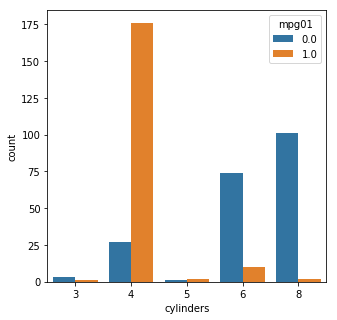

In [372]:
_, ax = plt.subplots(figsize=(5,5))
sns.countplot(ax=ax, x='cylinders', hue='mpg01', data=auto_dat)

**Dispacement, Horsepower and Weight**
- Cars with lower than average mpg tend to have lower displacement, horsepower and weight - displacement gives the best seperation.

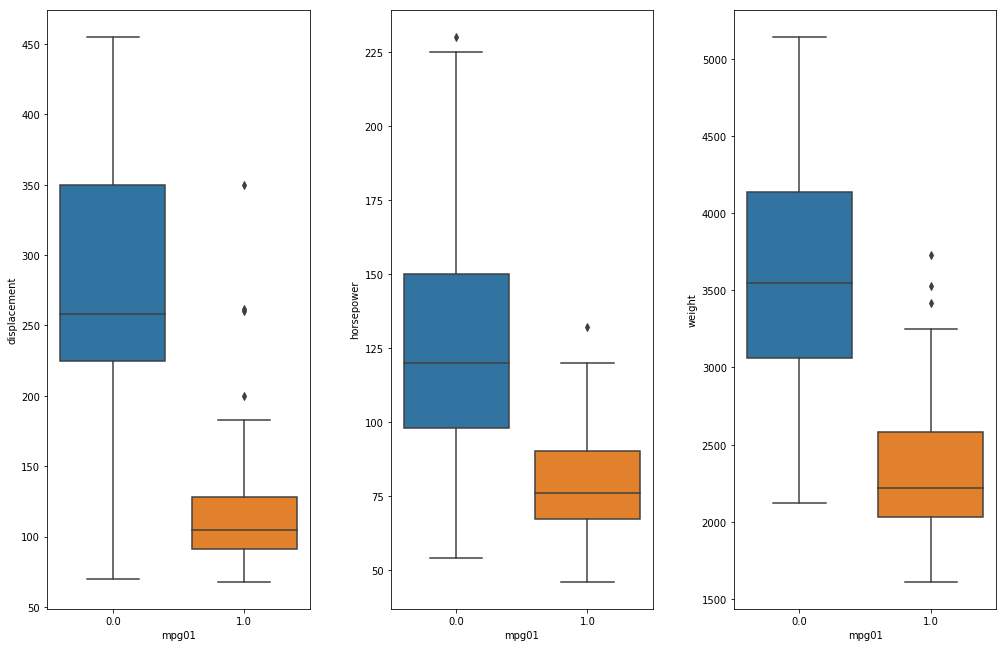

In [397]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,10))
fig.tight_layout(pad=5)
sns.boxplot(x='mpg01', y='displacement', data=auto_dat, ax=ax1)
sns.boxplot(x='mpg01', y='horsepower', data=auto_dat, ax=ax2)
sns.boxplot(x='mpg01', y='weight', data=auto_dat, ax=ax3)

**Acceleration**

- Cars with lower than average mpg tend to have marginally higher acceleration

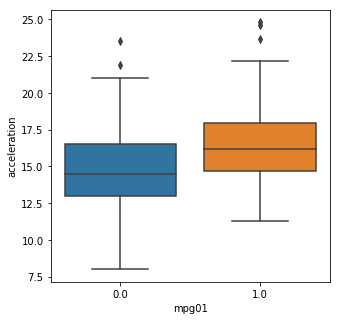

In [398]:
_, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x='mpg01', y='acceleration', data=auto_dat)

**Year**

- The proportion of cars with higher than average mpg increases with Year

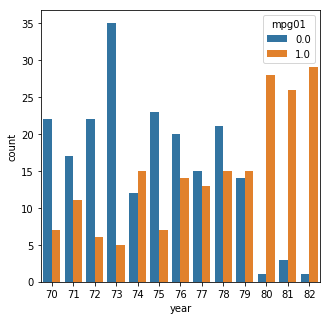

In [399]:
_, ax = plt.subplots(figsize=(5,5))
sns.countplot(ax=ax, x='year', hue='mpg01', data=auto_dat)

**Origin**

- Cars with origin = 1 are likely to have worse than average mpg
- Cars with orgin = 2,3 are likely to have better than average mpg

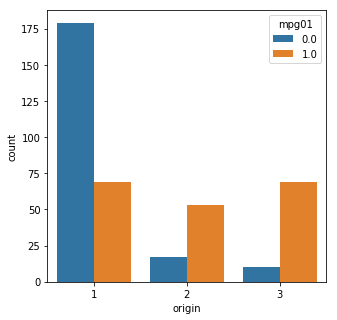

In [408]:
_, ax = plt.subplots(figsize=(5,5))
sns.countplot(ax=ax, x='origin', hue='mpg01', data=auto_dat)

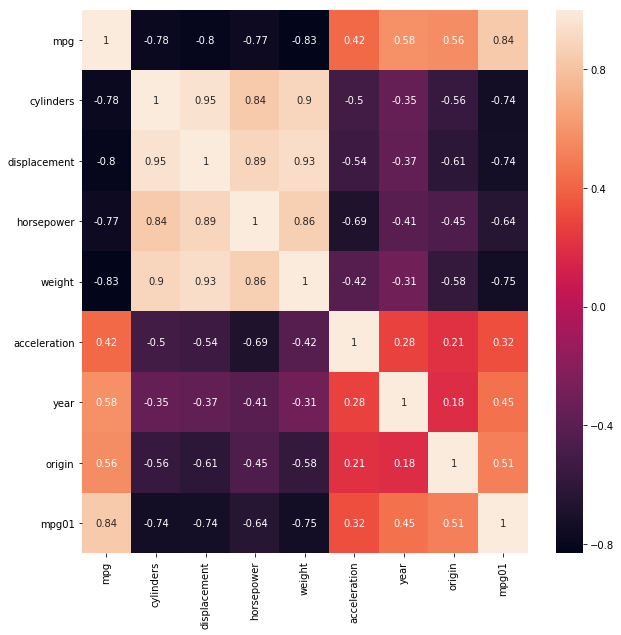

In [409]:
sns.heatmap(auto_dat.corr(),annot=True)

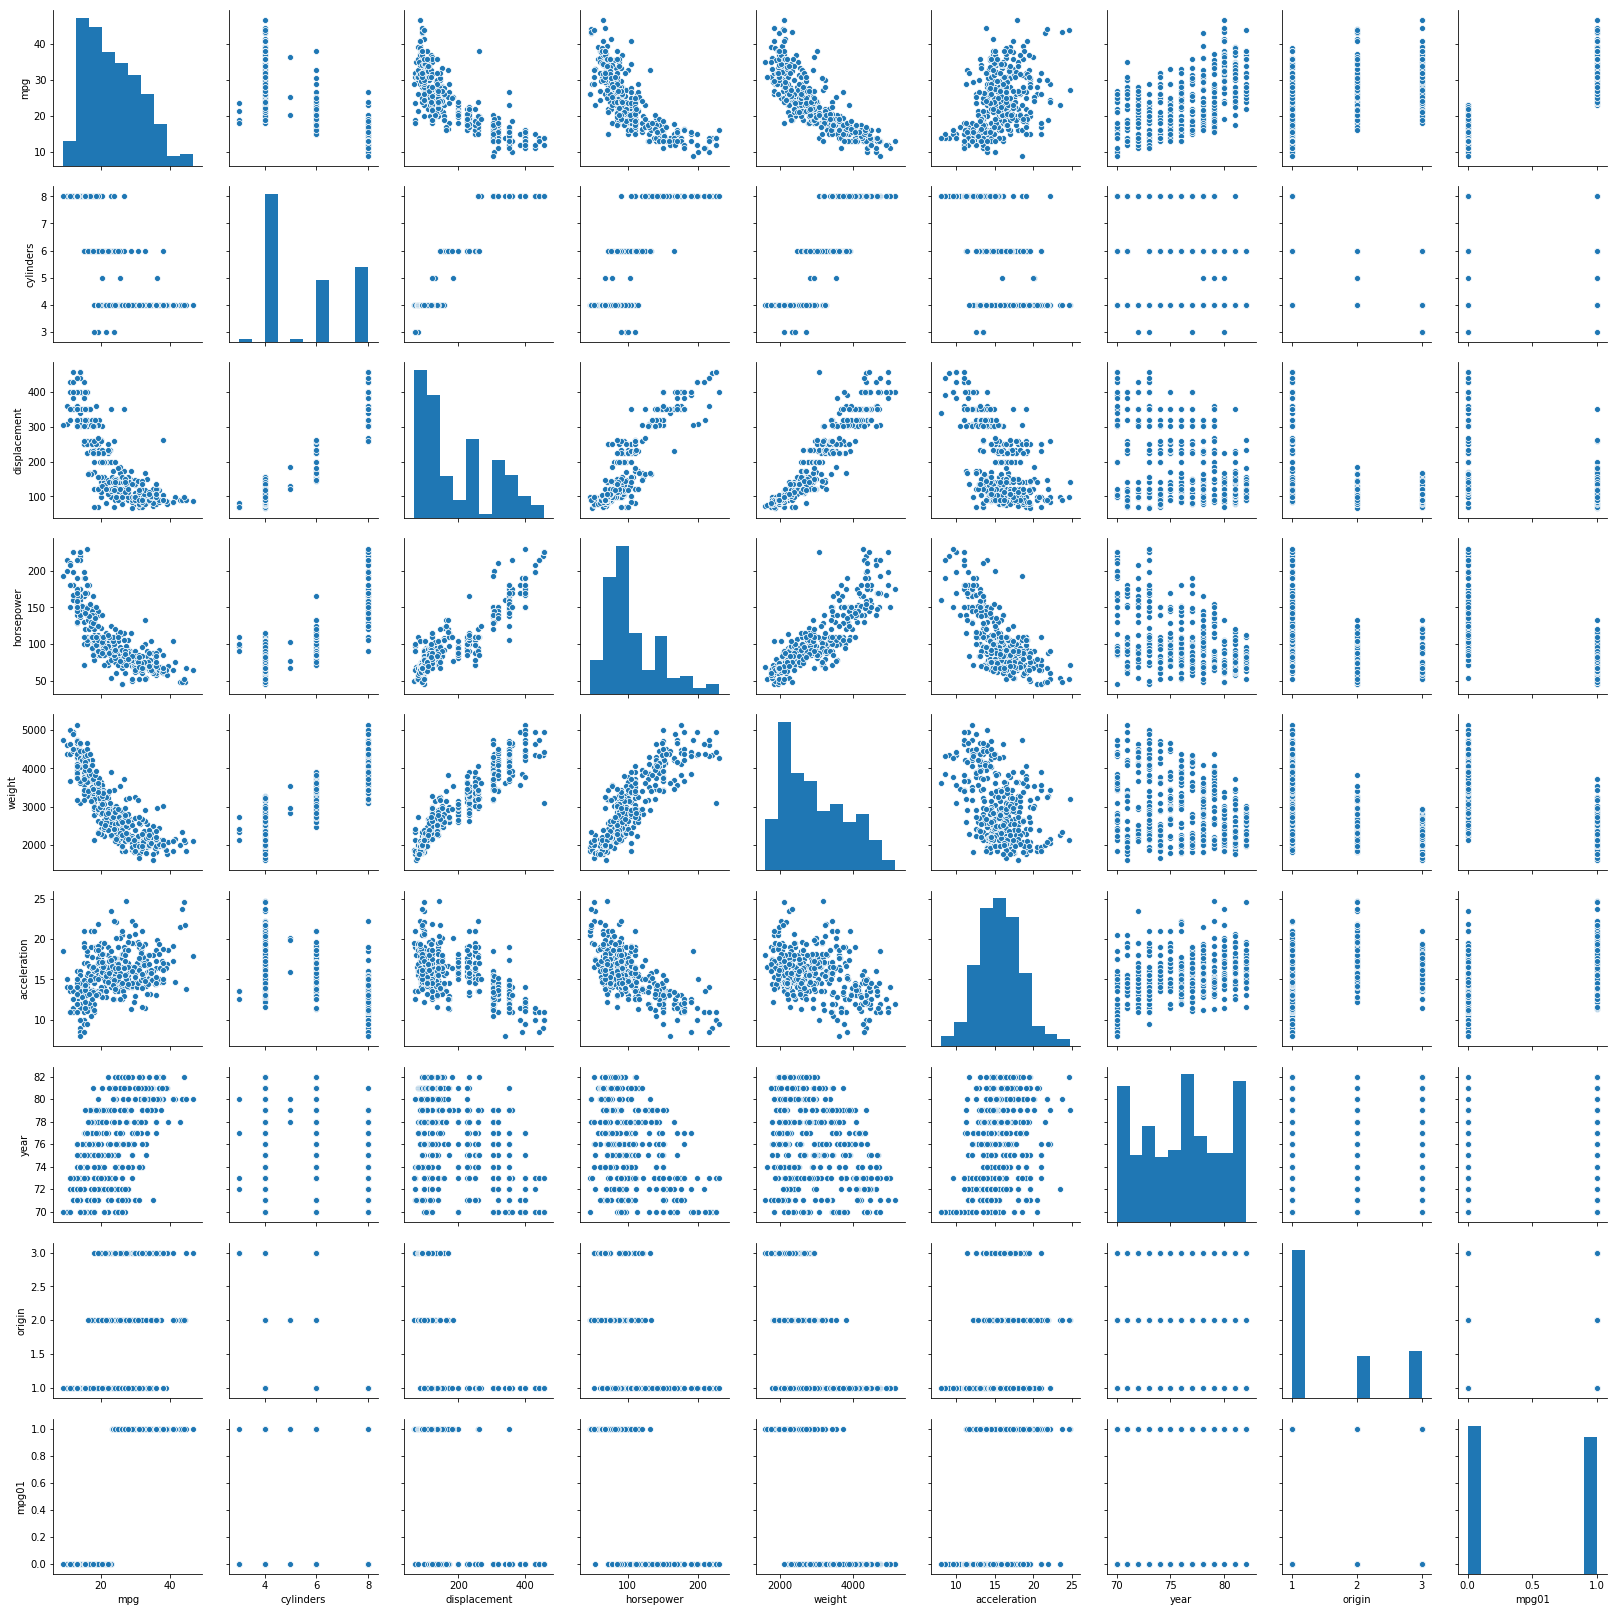

In [333]:
sns.pairplot(auto_dat)

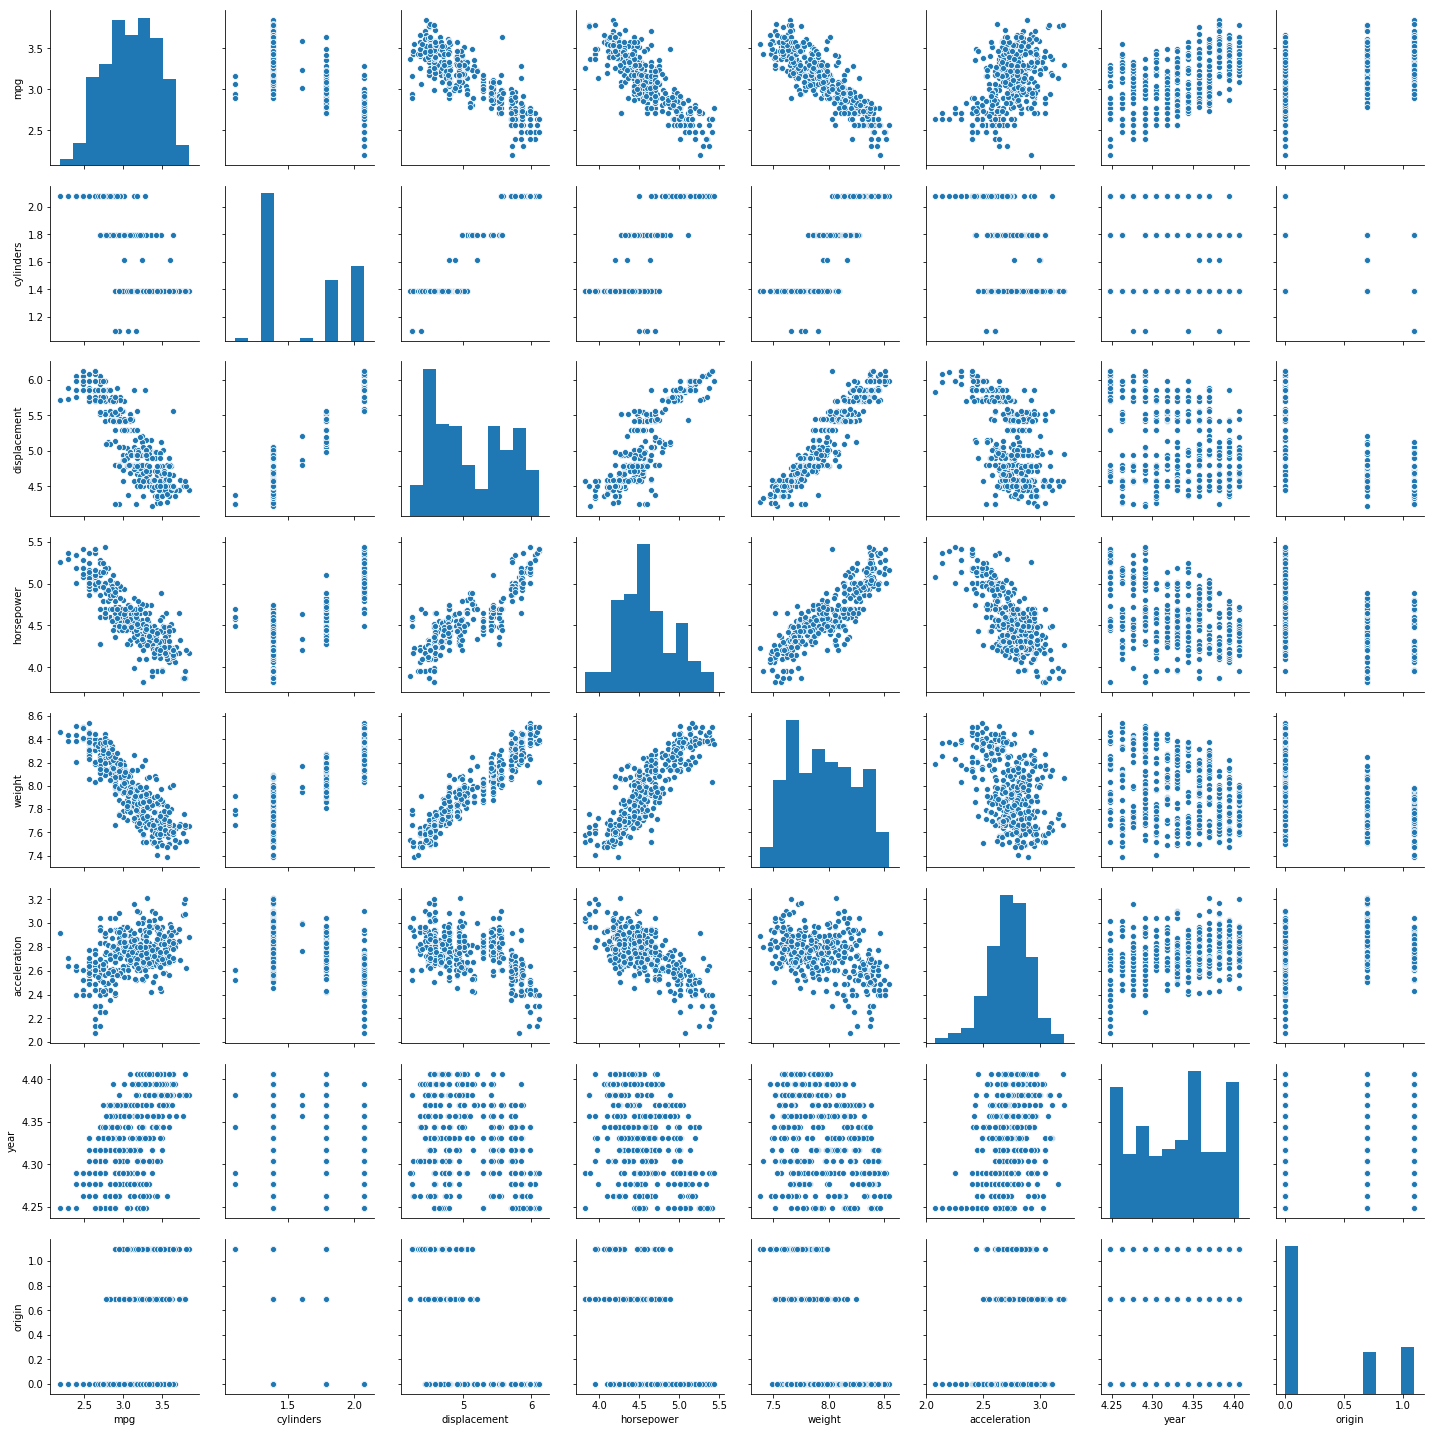

In [400]:
# Several of the relationships with mpg look log linear..
sns.pairplot(np.log(auto_dat.drop(['name', 'mpg01'], axis=1)))

(c) Split the data into a training set and a test set.

In [407]:
train, test = train_test_split(auto_dat, test_size=0.5)

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [414]:
lda = LinearDiscriminantAnalysis()
lda.fit(train.drop(['mpg01', 'mpg', 'name'], axis=1), train['mpg01'])
preds = lda.predict(test.drop(['mpg01', 'mpg', 'name'], axis=1))
(preds == test['mpg01']).mean()

0.9045226130653267

(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [423]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(train.drop(['mpg01', 'mpg', 'name'], axis=1), train['mpg01'])
preds = qda.predict(test.drop(['mpg01', 'mpg', 'name'], axis=1))
(preds == test['mpg01']).mean()

0.9195979899497487

(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [430]:
formula = 'mpg01 ~ ' + ' + '.join(train.drop(['mpg01', 'mpg', 'name'], axis=1).columns)
logit = smf.logit(formula=formula, data=train).fit()
preds = logit.predict(test.drop(['mpg01', 'mpg', 'name'], axis=1))
((preds > 0.5) ==  test['mpg01']).mean()

Optimization terminated successfully.
         Current function value: 0.171471
         Iterations 10


0.8894472361809045

(g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [435]:
def knn_reg_acc(indi_vars, k):
    indi_vars = [v for v in indi_vars]
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(pd.DataFrame(train[indi_vars]), train['mpg01'])
    preds = knn.predict(test[indi_vars])
    return (preds == test['mpg01']).mean()

indi_vars = train.drop(['mpg01', 'mpg', 'name'], axis=1).columns

res = []
up_to_k = 10

for indi_var_combo in list(powerset(indi_vars))[1:]:
    for k in np.arange(1, up_to_k):
        res.append([knn_reg_acc(indi_var_combo, k), indi_var_combo, k])

sorted(res, key=lambda x: x[0], reverse=True)

[[0.9296482412060302, ('cylinders', 'year'), 4],
 [0.9296482412060302, ('displacement', 'acceleration', 'year', 'origin'), 3],
 [0.9296482412060302,
  ('cylinders', 'displacement', 'acceleration', 'year', 'origin'),
  3],
 [0.9246231155778895, ('cylinders', 'year'), 6],
 [0.9246231155778895, ('displacement', 'acceleration', 'year'), 3],
 [0.9246231155778895,
  ('cylinders', 'displacement', 'acceleration', 'year'),
  3],
 [0.9195979899497487, ('displacement', 'acceleration', 'year'), 5],
 [0.9195979899497487, ('displacement', 'acceleration', 'year'), 6],
 [0.9195979899497487,
  ('cylinders', 'displacement', 'acceleration', 'year'),
  5],
 [0.9195979899497487,
  ('cylinders', 'displacement', 'acceleration', 'year'),
  6],
 [0.9195979899497487, ('displacement', 'acceleration', 'year', 'origin'), 5],
 [0.9195979899497487, ('displacement', 'acceleration', 'year', 'origin'), 6],
 [0.9195979899497487,
  ('cylinders', 'displacement', 'acceleration', 'year', 'origin'),
  5],
 [0.919597989949748

12. I'm leaving this out as it's an R syntax lesson and therefore not relevant to me.

13. Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various sub- sets of the predictors. Describe your findings.